In [307]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.calibration import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import StandardScaler


In [308]:
train = pd.read_csv('../csv/train.csv')
test = pd.read_csv('../csv/test.csv')

In [309]:
train.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [310]:
# id 컬럼 없애기

train.drop(columns=['id'], inplace=True)


In [311]:
df= train

In [312]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II
20756,Male,33.852953,1.700000,83.520113,yes,yes,2.671238,1.971472,Sometimes,no,2.144838,no,0.000000,0.973834,no,Automobile,Overweight_Level_II


In [313]:
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


# EDA

In [314]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

In [315]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


## 수치형 시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/244220688.py:22: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/244220688.py:22: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/244220688.py:22: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/244220688.py:22: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/244220688.py:22: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWar

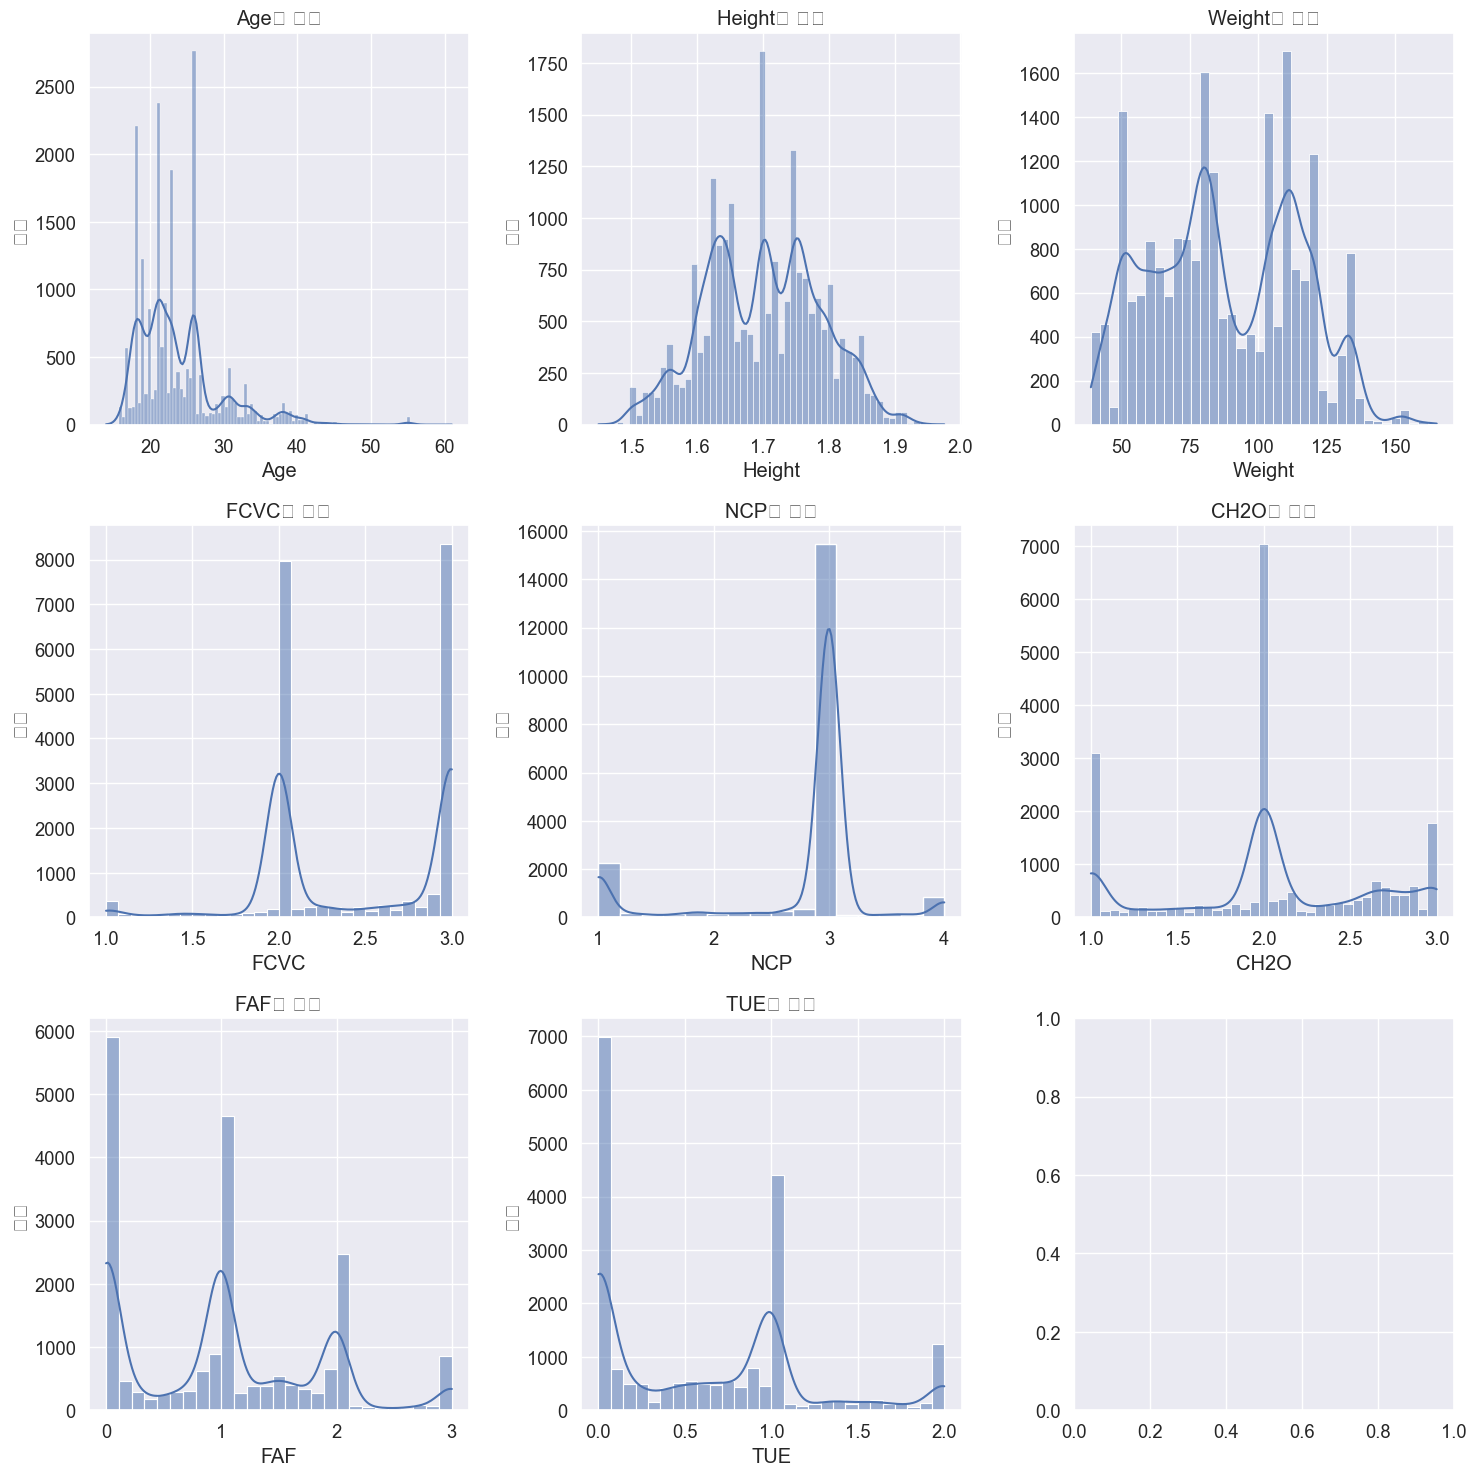

In [316]:
# 수치형 변수 열 선택
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 다중 플롯 설정
num_plots = len(numeric_columns) # 수치형의 len 값 : 8
num_cols = 3  # col = 3
num_rows = -(-num_plots // num_cols)  # -(-8 // 3) -> row = 3

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

plt.rcParams['font.family'] = 'AppleGothic'
# 각 수치형 변수에 대해 시각화 수행
for i, column in enumerate(numeric_columns):
    row = i // num_cols # //  두 수를 나누고 정수만 반환 ex) 0 // 3 = 0 , 1 // 3 = 0 , 2 // 3 = 0
    col = i % num_cols # % 나머지 반환 ex) 0 % 3 = 0 , 1 % 3 = 1 , 2 % 3 = 2 , 3 % 3 = 1
    
    sns.histplot(df[column], kde=True, ax=axes[row, col])  
    axes[row, col].set_title(f'{column}의 분포')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')

plt.tight_layout()
plt.show()


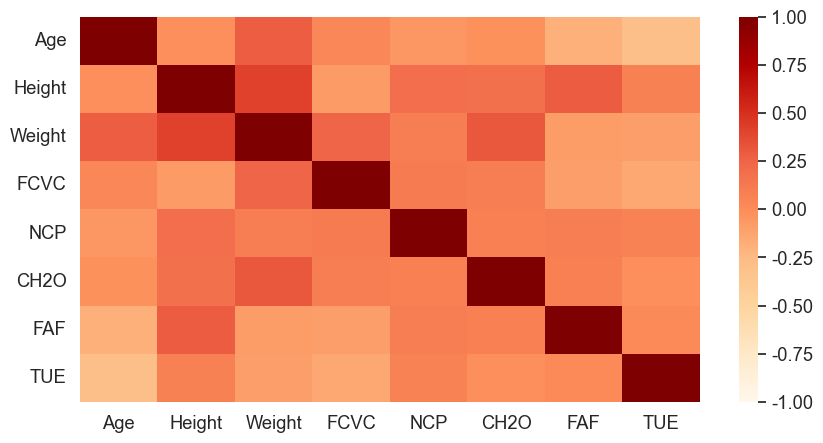

In [317]:
import seaborn as sns
plt.rcParams['font.family'] = 'Arial'
corr_numerical = df[numeric_columns].corr()

plt.figure(figsize=(10, 5))
sns.heatmap(corr_numerical, annot=False, cmap="OrRd", fmt='.3f', cbar=True, vmin=-1, vmax=1)
plt.show()

## 범주형 시각화

/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/773600070.py:20: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  plt.tight_layout()
/var/folders/yk/b_g90hzj7bv2tkjmnj046s6r0000gn/T/ipykernel_84360/773600070.py:20: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  plt.tight_layout()
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 48712 (\N{HANGUL SYLLABLE BIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/choejong-gyu/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


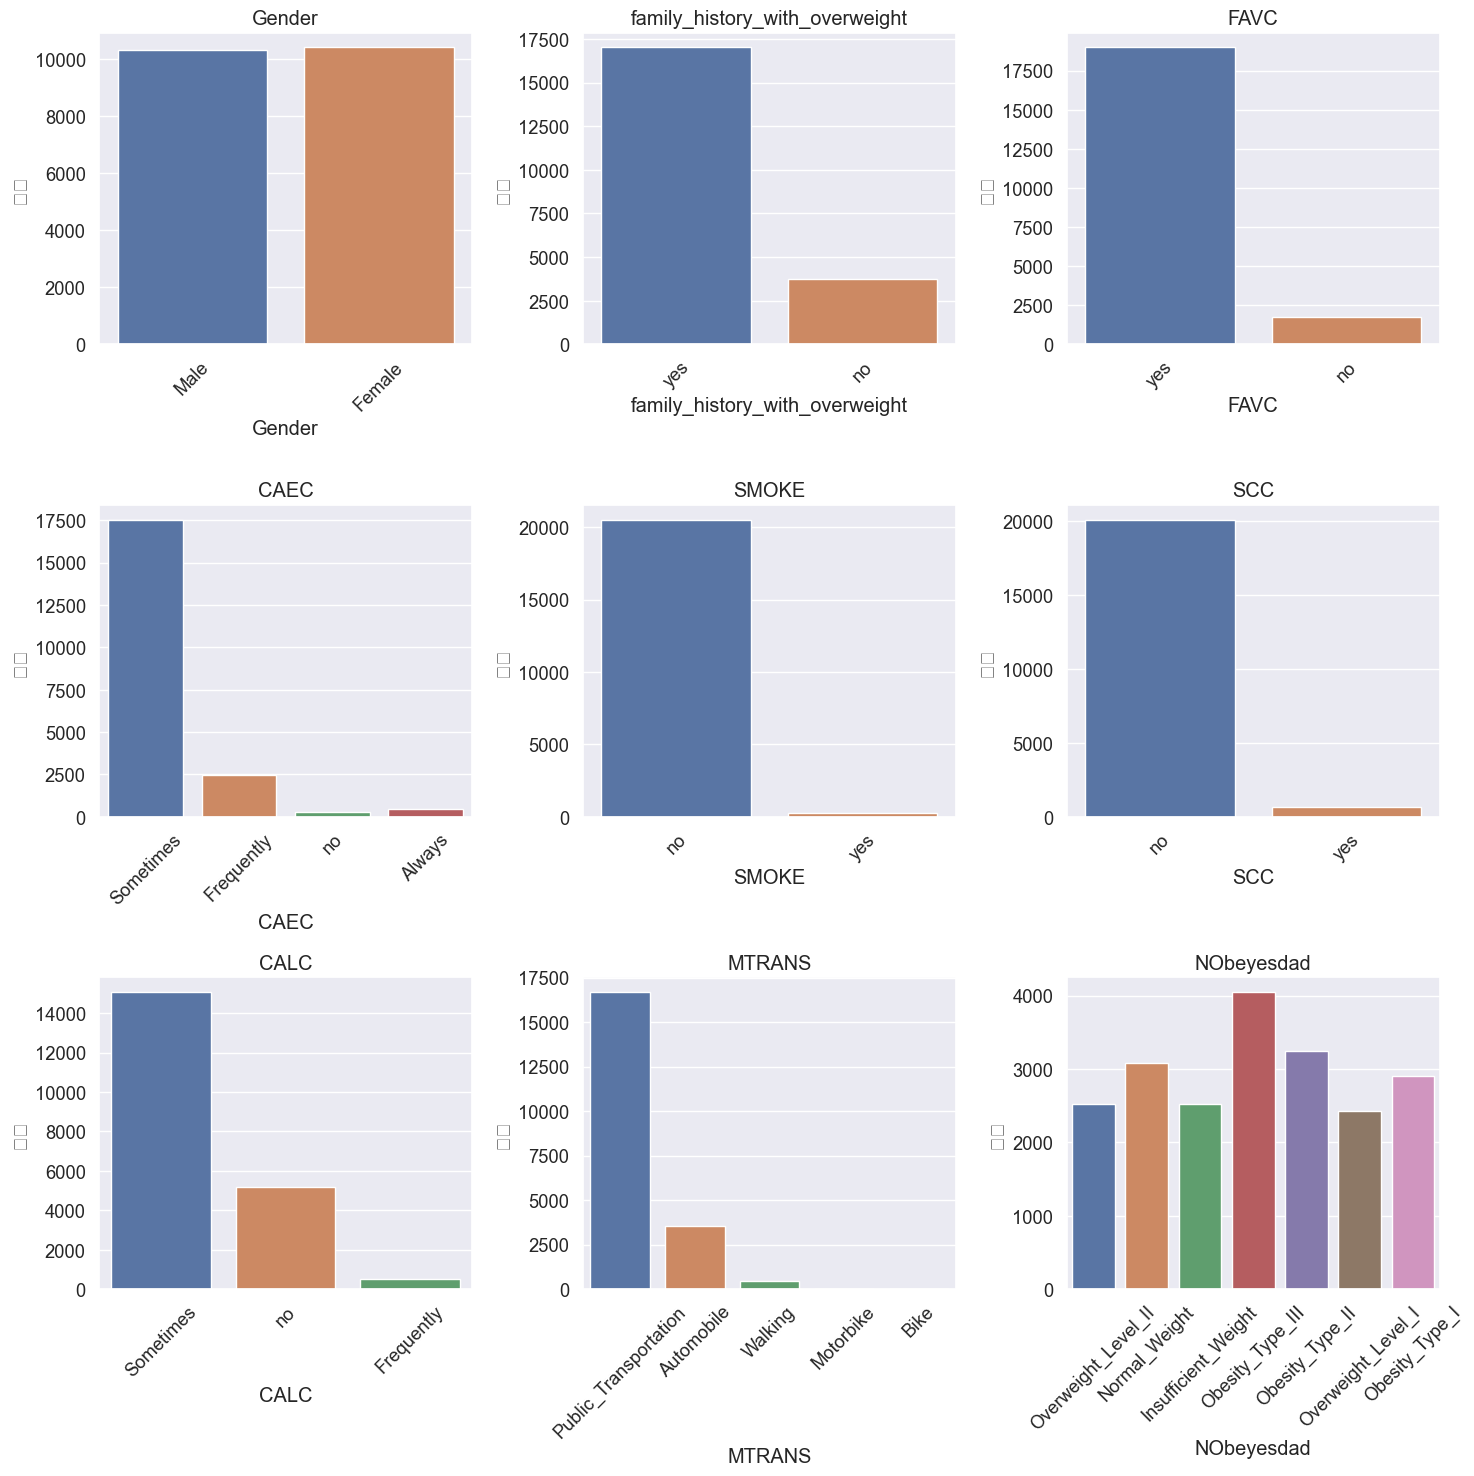

In [318]:
categorical_columns = df.select_dtypes(include=['object']).columns

# 다중 플롯 설정
num_plots = len(categorical_columns)
num_cols = 3  
num_rows = -(-num_plots // num_cols)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5*num_rows))

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    
    sns.countplot(data=df, x=column, ax=axes[row, col])
    axes[row, col].set_title(f'{column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('빈도')
    axes[row, col].tick_params(axis='x', rotation=45) 

plt.tight_layout()
plt.show()


# 데이터 전처리

## 범주형 변수

In [319]:
# 범주형 변수들 원-핫인코딩으로
df = pd.get_dummies(df, columns=['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'])

# NObeyesdad를 라벨인코딩을 통해 숫자로 변환
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])
df.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,6,False,...,True,False,False,True,False,False,False,False,True,False
1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,True,...,True,False,False,False,True,True,False,False,False,False
2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,0,True,...,True,False,False,False,True,False,False,False,True,False
3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,4,True,...,True,False,False,True,False,False,False,False,True,False
4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,6,False,...,True,False,False,True,False,False,False,False,True,False


## 수치형 변수

In [320]:
from sklearn.preprocessing import StandardScaler

numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# 'NObeyesdad' 열 제외
numeric_columns_except_target = numeric_columns.drop('NObeyesdad')


numeric_data_except_target = df[numeric_columns_except_target]

# 객체 생성
scaler = StandardScaler()

# 표준화
scaled_numeric_data_except_target = scaler.fit_transform(numeric_data_except_target)

# 데이터프레임으로 변환
scaled_numeric_df_except_target = pd.DataFrame(scaled_numeric_data_except_target, columns=numeric_columns_except_target)

# 원래 데이터프레임에 표준화된 변수 추가
df[numeric_columns_except_target] = scaled_numeric_df_except_target


In [321]:
df

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,NObeyesdad,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,6,False,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,1,True,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,0,True,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,4,True,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,6,False,...,True,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.227725,0.760293,0.996987,0.888355,0.338364,0.201151,0.416056,-0.697686,3,False,...,True,False,False,True,False,False,False,False,True,False
20754,-1.027052,0.111729,-1.436296,1.039171,1.756085,-1.691863,1.214691,0.636513,0,False,...,True,False,False,True,False,False,False,False,True,False
20755,-0.657669,1.366537,0.670717,-0.071439,0.338364,-0.048349,0.210303,0.966092,3,False,...,True,False,False,False,True,False,False,False,True,False
20756,1.760067,-0.002805,-0.165574,0.422594,-1.119801,0.189694,-1.171141,0.593055,6,False,...,True,False,False,False,True,True,False,False,False,False


# 데이터 분할

In [322]:
X = df.drop('NObeyesdad',axis=1)
y = df['NObeyesdad']

In [323]:
X.head()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0.105699,-0.002828,-0.235713,-0.836279,0.314684,1.206594,-1.171141,0.597438,False,True,...,True,False,False,True,False,False,False,False,True,False
1,-1.027052,-1.606291,-1.170931,-0.836279,0.338364,-0.048349,0.021775,0.636513,True,False,...,True,False,False,False,True,True,False,False,False,False
2,-1.027052,0.128451,-1.430012,-1.060332,-1.913423,-0.195644,-0.138022,1.755239,True,False,...,True,False,False,False,True,False,False,False,True,False
3,-0.507929,0.120090,1.644770,1.039171,0.338364,-0.584035,0.579896,0.271455,True,False,...,True,False,False,True,False,False,False,False,True,False
4,1.371197,2.450367,0.224054,0.438397,-1.119801,-0.081469,1.176486,0.523111,False,True,...,True,False,False,True,False,False,False,False,True,False


In [324]:
y.head()

0    6
1    1
2    0
3    4
4    6
Name: NObeyesdad, dtype: int64

In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,Gender_Male,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9958,-1.202863,0.798937,0.345438,1.039171,0.338364,-0.048349,2.407607,0.636513,False,True,...,True,False,False,False,True,True,False,False,False,False
7841,-0.206438,0.608684,-1.251408,-0.836279,1.756085,-0.048349,1.214691,0.636513,False,True,...,True,False,False,False,True,False,False,False,True,False
9293,-0.352234,1.370087,1.294114,1.039171,0.169396,-0.631241,-0.288525,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
15209,3.016595,-1.377221,-0.299019,-0.836279,0.338364,-1.691863,-1.171141,-1.024344,True,False,...,True,False,False,True,False,True,False,False,False,False
16515,-0.147998,1.142541,0.269619,1.039171,0.338364,1.595165,1.214691,0.636513,False,True,...,True,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,-1.027052,0.254451,-0.282234,0.342987,-0.281329,-0.303677,-0.827543,0.175253,True,False,...,True,False,False,False,True,False,False,False,True,False
11964,-0.323809,0.569868,0.269619,1.039171,0.338364,-0.048349,2.407607,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
5390,-0.499620,-0.919083,-0.753930,-0.836279,0.338364,1.595165,1.214691,-1.024344,False,True,...,True,False,False,True,False,False,False,False,True,False
860,0.379434,-0.574047,0.911789,1.039171,0.338364,1.218360,-1.171141,-0.630211,True,False,...,True,False,False,True,False,False,False,False,True,False


In [291]:
X_train.shape ,X_test.shape, y_train.shape, y_test.shape

((16606, 30), (4152, 30), (16606,), (4152,))